# **Importing libraries**





In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, classification_report

import warnings 
warnings.filterwarnings('ignore')
from keras.optimizers import SGD
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Model as ker, Sequential
from tensorflow.keras.layers import Dense, Input

import time
#add other imports here if any (for example, pytorch)
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# **load parkinson dataset**





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pd_speech_features.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
# Print the first 5 rows of the data set.
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [ ]:
# checking missing values in the data
data.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

# **Definition X , y**

In [ ]:
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
print('the shape of X: {}'.format(X.shape))
print('the shape of y: {}'.format(y.shape))

the shape of X: (756, 753)
the shape of y: (756,)


In [ ]:
from collections import Counter
print('Original y_train shape %s' % Counter(y))

Original y_train shape Counter({1: 564, 0: 192})


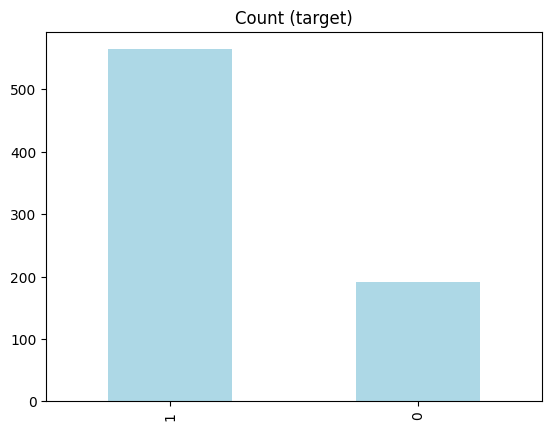

In [ ]:
y.value_counts().plot(kind='bar', title='Count (target)',color ="lightblue");

# **SMOTE for Balancing Data**

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE(random_state = 42)
X_over, y_over = oversample.fit_resample(X, y)
# summarize the new class distribution
print('Resampled y shape %s' % Counter(y_over))

print('the shape of X: {}'.format(X_over.shape))
print('the shape of y: {}'.format(y_over.shape))

Resampled y shape Counter({1: 564, 0: 564})
the shape of X: (1128, 753)
the shape of y: (1128,)


<Axes: title={'center': 'Count (target)'}>

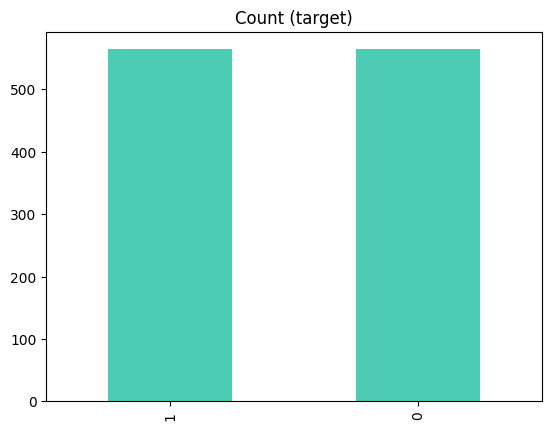

In [ ]:
# observe that data has been balanced
y_over.value_counts().plot(kind='bar', title='Count (target)',color =(0.3,0.8,0.7))

In [ ]:
#another method for balancing data due to undersampling of majority class

#from imblearn.under_sampling import NearMiss
#undersample = NearMiss()
#X_miss, y_miss =undersample.fit_resample(X, y)
#print('under_Resampled y shape %s' % Counter(y_miss))

# **Normalizing Data**

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_over = min_max_scaler.fit_transform(X_over)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

# **Dimension Reduction**

##Determine best n_components for variance > 0.95

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new=pca.fit_transform(X_over)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

109


##PCA with Whitening

In [ ]:
pca_w = PCA(svd_solver="full", n_components="mle",whiten=True)
X_pca_Whitening=pca_w.fit_transform(X_over)
n_components_pca_mle = pca_w.n_components_
print(n_components_pca_mle)
# print(len(X_pca_Whitening))

710


<Figure size 640x480 with 0 Axes>

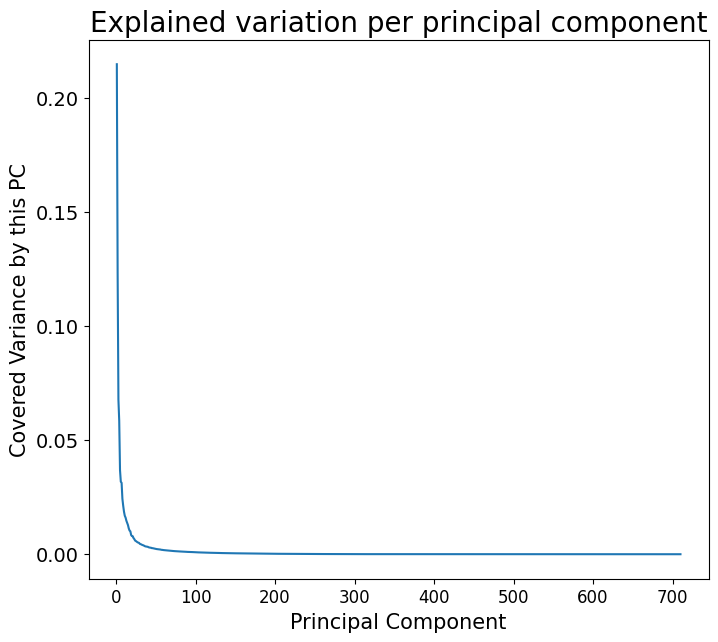

Explained variation per principal component for the first two PCs: [0.21463195 0.12334223]


In [ ]:
xs = np.array(range(1,711))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca_w.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.show()
print('Explained variation per principal component for the first two PCs: {}'.format(pca_w.explained_variance_ratio_[0:2]))

In [ ]:
#best n_components is between 100 to 200

pca_w = PCA(n_components=109 ,whiten=True)
X_pca_Whitenig=pca_w.fit_transform(X_over)

In [ ]:
pca_w.explained_variance_ratio_

array([0.21463195, 0.12334223, 0.06766925, 0.05840849, 0.03681981,
       0.03176758, 0.03126613, 0.02429659, 0.02123865, 0.01864039,
       0.01685074, 0.01604204, 0.01467863, 0.01368971, 0.01277309,
       0.01131144, 0.01037147, 0.01005079, 0.00841277, 0.00795142,
       0.00787332, 0.00706889, 0.00661069, 0.00596886, 0.00576693,
       0.00550494, 0.00523026, 0.00505756, 0.00493461, 0.00453062,
       0.0044078 , 0.00425762, 0.00404495, 0.0039481 , 0.00379494,
       0.00356507, 0.0034308 , 0.00336845, 0.00327942, 0.00323641,
       0.00303293, 0.00292664, 0.00286941, 0.00283284, 0.00267433,
       0.0026533 , 0.00257502, 0.00253421, 0.0024168 , 0.00234012,
       0.00226418, 0.00223951, 0.00217336, 0.00213052, 0.00211122,
       0.00204466, 0.00193492, 0.00191395, 0.00184264, 0.00180509,
       0.00178156, 0.00174656, 0.00171699, 0.00166848, 0.00162986,
       0.00160193, 0.00157472, 0.0015192 , 0.00150671, 0.00145193,
       0.00141869, 0.00140507, 0.0013933 , 0.00134703, 0.00131

In [ ]:
pca_w.explained_variance_ratio_.shape

(109,)

In [ ]:
print(abs(pca_w.components_))

[[0.20856855 0.02065556 0.0815353  ... 0.03301933 0.04216433 0.05082756]
 [0.15498368 0.0119243  0.00961492 ... 0.0282595  0.0474109  0.06685819]
 [0.13091509 0.0980826  0.08571475 ... 0.10143814 0.09866713 0.08837025]
 ...
 [0.04676636 0.13082577 0.00360489 ... 0.05027597 0.05656156 0.02039892]
 [0.00957607 0.01036806 0.05337739 ... 0.02191016 0.0127904  0.05368927]
 [0.00300048 0.02564396 0.07909381 ... 0.03145055 0.01022396 0.05682854]]


##PCA without Whitening

In [ ]:
pca_without_w = PCA(svd_solver="auto", n_components=109,whiten=False)
X_pca=pca_without_w.fit_transform(X_over)
print(X_pca.shape)

(1128, 109)


##LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X_over, y_over)

In [ ]:
lda_var_ratios = lda.explained_variance_ratio_

In [ ]:
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [ ]:
best_n_components=select_n_components(lda_var_ratios, 0.95)
print(best_n_components)

1


In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_over, y_over)
print(X_lda.shape)
print(lda.explained_variance_ratio_)

(1128, 1)
[1.]


##ICA

In [ ]:
from sklearn.decomposition import FastICA

# Number of sources wanted. 
ica = FastICA(n_components=100, whiten=True, max_iter=1000)
X_ica = ica.fit_transform(X_over)
print(ica.components_)
print(X_ica.shape)

[[ 0.00205371 -0.00289227 -0.00273083 ...  0.0030967  -0.00069348
  -0.00107371]
 [ 0.00150567  0.00239982 -0.00191809 ... -0.00039549 -0.00221808
  -0.00649359]
 [-0.00771115 -0.13824286  0.00066136 ... -0.00400497  0.01021497
   0.00646995]
 ...
 [-0.0134279   0.00380987 -0.00429425 ...  0.00193305  0.00525206
  -0.01111833]
 [ 0.00976394  0.00806331  0.02289579 ... -0.00341092 -0.01223519
   0.00738368]
 [-0.00949141  0.00508944  0.00779807 ...  0.00304091 -0.00094893
  -0.0027501 ]]
(1128, 100)


## Sequential Backward Feature Elimination

In [ ]:
# from sklearn.feature_selection import SequentialFeatureSelector 
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier(n_neighbors=3)
# sfs = SequentialFeatureSelector(knn, n_features_to_select=3 , direction='backward',scoring='accuracy',cv=4,n_jobs=-1)
# x_sfs=sfs.fit_transform(X_over, y_over)

In [ ]:
# feat_names = list(sfs.n_feature_names_)
# print(feat_names)

In [ ]:
# sfs.get_feature_names_out(input_features=None)

# **Train test split using X_pca obtained from PCA without whitening**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_over, test_size=0.25, random_state=47)
print('the shape of X_train: {}'.format(X_train.shape))
print('the shape of y_train: {}'.format(y_train.shape))
print('the shape of X_train: {}'.format(X_test.shape))
print('the shape of y_test: {}'.format(y_test.shape))

the shape of X_train: (846, 109)
the shape of y_train: (846,)
the shape of X_train: (282, 109)
the shape of y_test: (282,)


# **Confusion Matrix Plotting Code**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

# **ROC Curve Plotting Code**

In [ ]:
def plot_roc_curve(y_test, y_pred):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8, 6))

    # method I: plt
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=11)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.005, 1])
    plt.ylim([0, 1.005])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.grid(color='r', linestyle='--', linewidth=0.2)
    plt.show()

# **KNeighbors Classifier using PCA Without Whitening**



##Determine n_neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

k_range = list(range(1,21))
scores = [ ]
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train, y_train)
   y_pred_knn = knn.predict(X_test)
   scores.append(metrics.accuracy_score(y_test, y_pred_knn))
   
 
new_scores=np.array(scores)
print(new_scores.reshape(-1,1))

[[0.94680851]
 [0.87588652]
 [0.89716312]
 [0.84042553]
 [0.86879433]
 [0.83687943]
 [0.84397163]
 [0.82269504]
 [0.83333333]
 [0.81560284]
 [0.82978723]
 [0.81914894]
 [0.84042553]
 [0.82269504]
 [0.82624113]
 [0.80851064]
 [0.81914894]
 [0.80141844]
 [0.81205674]
 [0.79432624]]


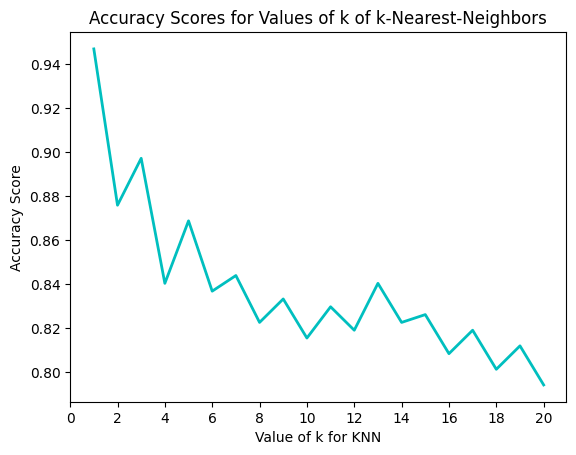

In [ ]:
plt.plot(k_range, scores,c='c',linewidth=2)
plt.xlabel('Value of k for KNN')
plt.xticks([2 * i for i in range(11)])

plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

##Implement KNN

In [ ]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train,y_train)
KNN_train_time = time.time() - start_time
y_pred_knn=knn.predict(X_test)
y_p_train_knn=knn.predict(X_train)
# Print the training times of the models
print("KNN Time: ", KNN_train_time)

KNN Time:  0.002360820770263672


##Evaluating the performance of the model

####Report

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       143
           1       1.00      0.79      0.88       139

    accuracy                           0.90       282
   macro avg       0.92      0.90      0.90       282
weighted avg       0.91      0.90      0.90       282



###Accuracy

In [ ]:
print("Train Accuracy KNN Model :=> %.2f%%" % (metrics.accuracy_score(y_train, y_p_train_knn)*100))
print("--------------------------------------------------------")
print("Test Accuracy KNN Model :=> %.2f%%" % (metrics.accuracy_score(y_test, y_pred_knn)*100))


Train Accuracy KNN Model :=> 97.28%
--------------------------------------------------------
Test Accuracy KNN Model :=> 89.72%


##Recall

In [ ]:
recall = recall_score(y_test,y_pred_knn)

print('Recall: ',recall)

Recall:  0.7913669064748201


###Confusion Matrix

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred_knn)
print(confusion_mtx)

[[143   0]
 [ 29 110]]


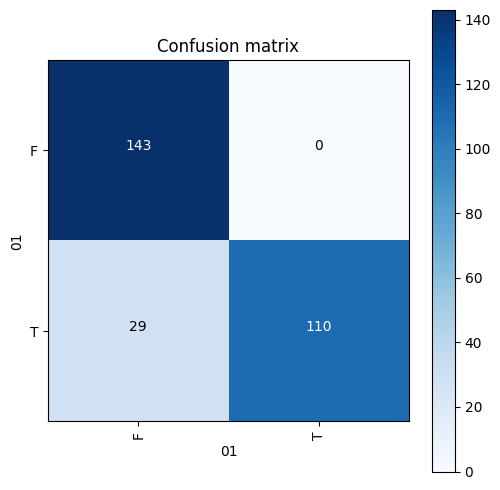

In [ ]:
plot_confusion_matrix(confusion_mtx, "FT")

###ROC

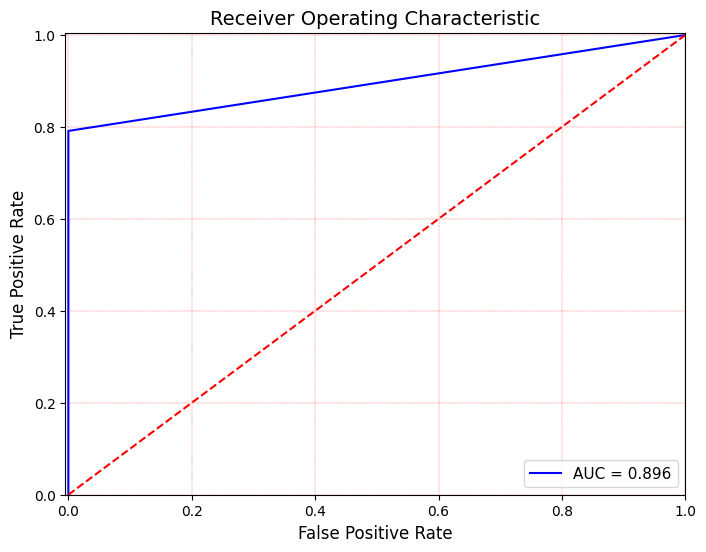

In [ ]:
plot_roc_curve(y_test, y_pred_knn)

# **SVM_PCA Without Whitening**

In [ ]:
%%time
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# class_weight=None
class_weight='balanced'

models = (svm.SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight),
          svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight=class_weight),
          svm.SVC(kernel='rbf',class_weight=class_weight, decision_function_shape='ovr'),
          svm.SVC(kernel='poly',class_weight=class_weight, degree=3, decision_function_shape='ovr')
          )
start_time = time.time()
models_fit = (clf.fit(X_train, y_train) for clf in models)
# title for the plots
titles = ('SVM with linear Kernel, One-vs-Rest',
          'SVM with linear Kernel, One-VS-One',
          'SVM with RBF Kernel, One-vs-Rest',
          'SVM with Polynomial (degree 3) Kernel, One-vs-Rest')



SVM_train_time = time.time() - start_time
# Print the training times of the models
print("SVM Time: ", SVM_train_time)


SVM Time:  1.430511474609375e-06
CPU times: user 195 µs, sys: 0 ns, total: 195 µs
Wall time: 204 µs


##Evaluating the performance of the model

###Score

In [ ]:
scores = []
for clf, title in zip(models_fit, titles):
    scores.append(clf.score(X_test, y_test))

print('Accuracy of SVM with linear Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[0]*100))
print('Accuracy of SVM with linear Kernel, One-vs-One:=> {:.2f} %'.format(scores[1]*100))
print('Accuracy of SVM with RBF Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[2]*100))
print('Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[3]*100))

Accuracy of SVM with linear Kernel, One-vs-Rest:=> 90.43 %
Accuracy of SVM with linear Kernel, One-vs-One:=> 90.43 %
Accuracy of SVM with RBF Kernel, One-vs-Rest:=> 92.91 %
Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> 89.36 %


###Confusion Matrix & ROC

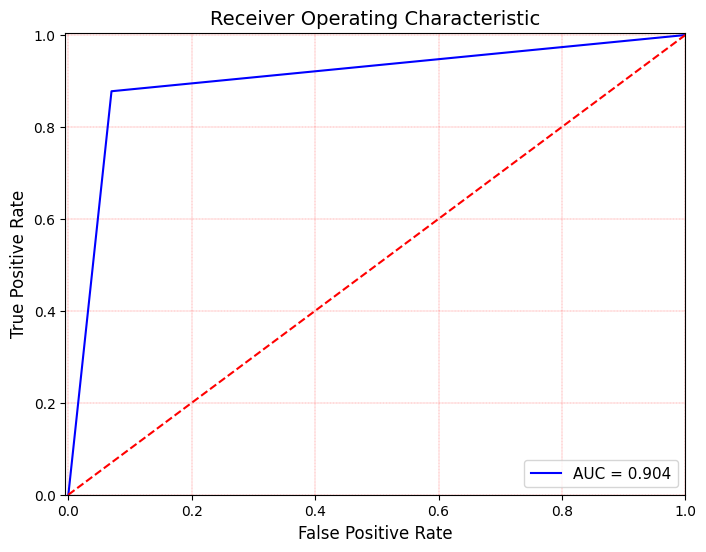

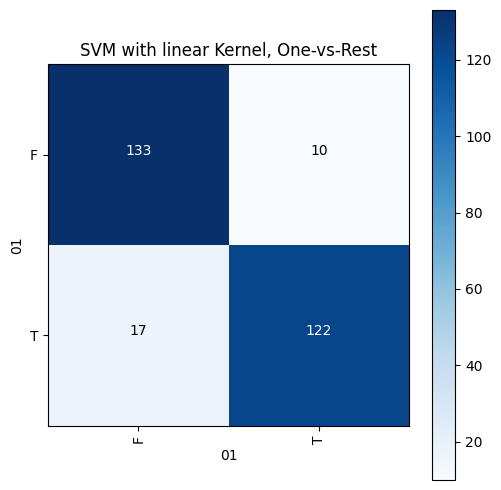

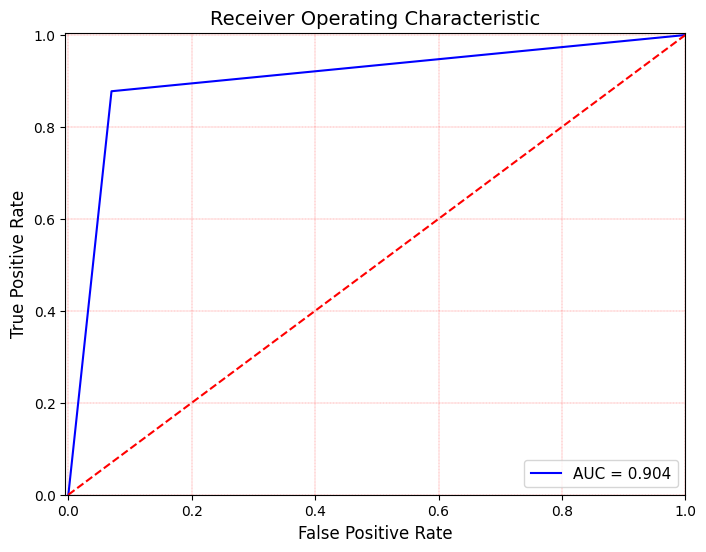

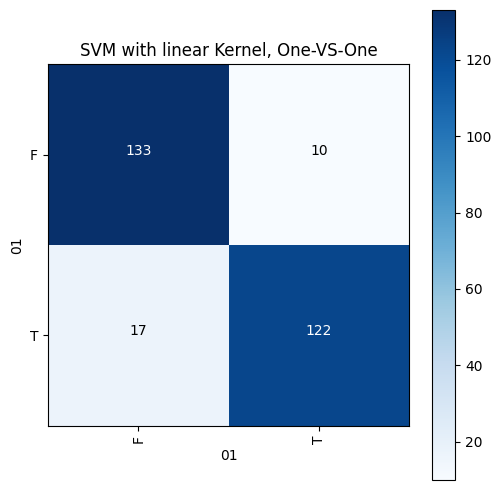

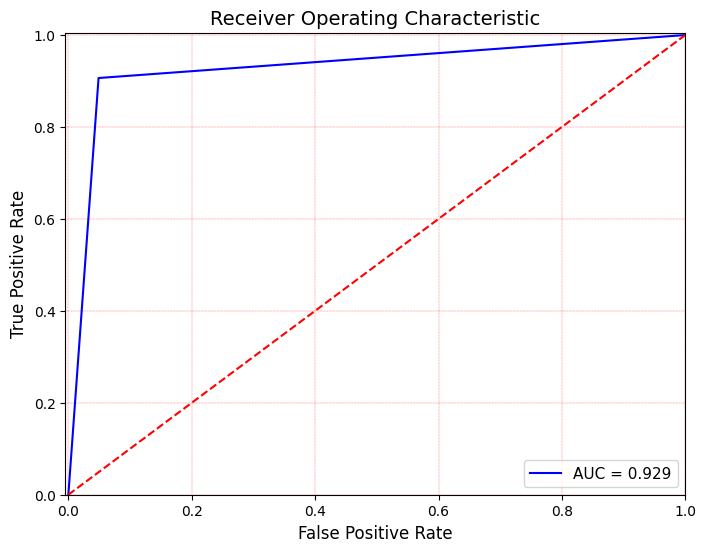

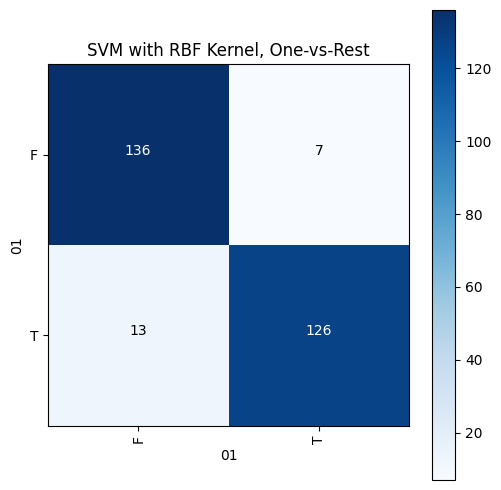

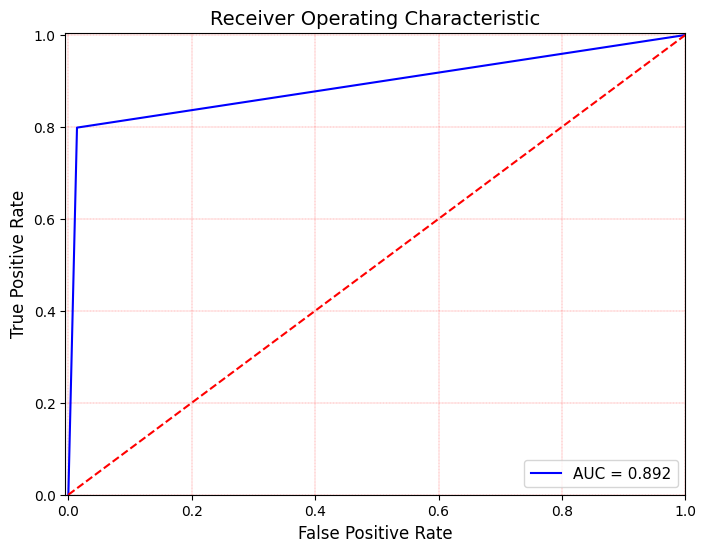

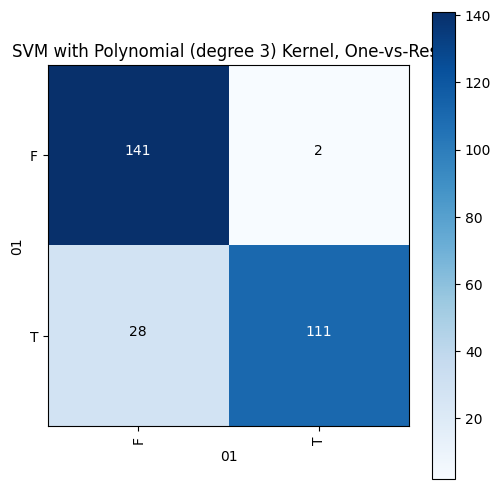

In [ ]:
models_fit_mat = (clf.fit(X_train, y_train) for clf in models)

plt.style.use('default')
for title, clf in zip(titles, models_fit_mat):
    y_pred_svm = clf.predict(X_test)
    plot_roc_curve(y_test, y_pred_svm)
    confusion_mtx = confusion_matrix(y_test, y_pred_svm)
    plot_confusion_matrix(confusion_mtx, "FT", title=title)


In [ ]:
for clf, title in zip(models, titles):
  clf.fit(X_train, y_train)
  y_pred_svm = clf.predict(X_test)
  y_p_train_svm=clf.predict(X_train)
  print(classification_report(y_test, y_pred_svm))
  print("Train Accuracy "+title+" Model :=> %.2f%%" % (metrics.accuracy_score(y_train, y_p_train_svm)*100))
  print("--------------------------------------------------------")
  print("Test Accuracy "+title+" Model :=> %.2f%%" % (metrics.accuracy_score(y_test, y_pred_svm)*100))
  print("--------------------------------------------------------")
  recall = recall_score(y_test,y_pred_svm)
  print('Recall: ',recall)
  print("--------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       143
           1       0.92      0.88      0.90       139

    accuracy                           0.90       282
   macro avg       0.91      0.90      0.90       282
weighted avg       0.91      0.90      0.90       282

Train Accuracy SVM with linear Kernel, One-vs-Rest Model :=> 92.55%
--------------------------------------------------------
Test Accuracy SVM with linear Kernel, One-vs-Rest Model :=> 90.43%
--------------------------------------------------------
Recall:  0.8776978417266187
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       143
           1       0.92      0.88      0.90       139

    accuracy                           0.90       282
   macro avg       0.91      0.90      0.90       282
weighted avg       0.91      0.90      0.90       282

Train Accura

# **Logistic Regression**



##Implement LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=27, max_iter=1000)
# fitting the classifier
start_time = time.time()
lgr.fit(X_train, y_train)
lgr_time = time.time() - start_time

y_pred_lgr= lgr.predict(X_test)
y_p_train_lgr= lgr.predict(X_train)
# Print the training times of the models
print("Logistic Regression Time: ", lgr_time)

Logistic Regression Time:  0.06171393394470215


##Evaluating the performance of the model

In [ ]:

print("Train Accuracy LogisticRegression Model :=> %.2f%%" % (metrics.accuracy_score(y_train, y_p_train_lgr)*100))

print("Test Accuracy LogisticRegression Model :=> %.2f%%" % (metrics.accuracy_score(y_test, y_pred_lgr)*100))

print("--------------------------------------------------------")
recall = recall_score(y_test,y_pred_lgr)
print('Recall: ',recall)

Train Accuracy LogisticRegression Model :=> 90.78%
Test Accuracy LogisticRegression Model :=> 86.88%
--------------------------------------------------------
Recall:  0.8489208633093526


In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred_lgr)
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       143
           1       0.88      0.85      0.86       139

    accuracy                           0.87       282
   macro avg       0.87      0.87      0.87       282
weighted avg       0.87      0.87      0.87       282



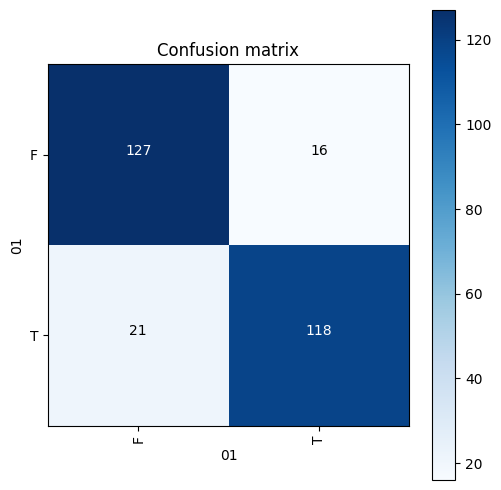

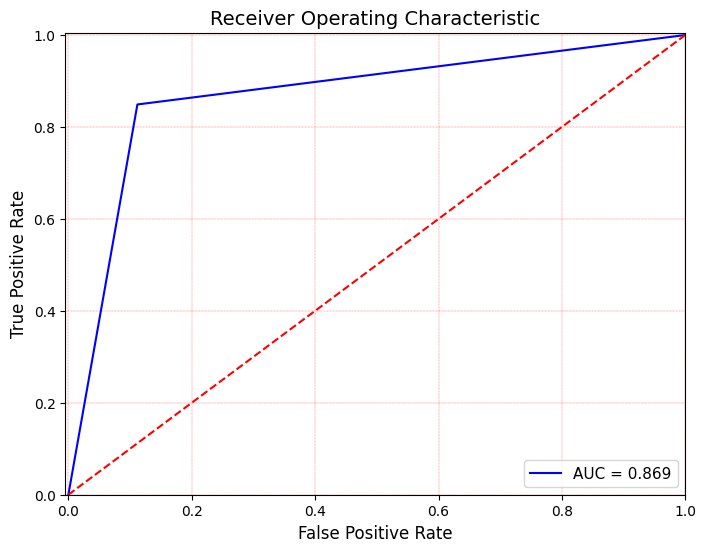

In [ ]:
plot_confusion_matrix(confusion_mtx, "FT")

plot_roc_curve(y_test, y_pred_lgr)

Number of false positive sample is 128. Number of true positive sample is 117. 
Accuracy: It gives you the overall accuracy of the model, meaning the fraction of the total samples that were correctly classified by the classifier. To calculate accuracy, use the following formula: 
(TP+TN)/(TP+TN+FP+FN).
Precision: It tells you what fraction of predictions as a positive class were actually positive. To calculate precision, use the following formula: TP/(TP+FP).
Recall: It tells you what fraction of all positive samples were correctly predicted as positive by the classifier. It is also known as True Positive Rate (TPR), Sensitivity, Probability of Detection. To calculate Recall, use the following formula: TP/(TP+FN).
Specificity: It tells you what fraction of all negative samples are correctly predicted as negative by the classifier. It is also known as True Negative Rate (TNR). To calculate specificity, use the following formula: TN/(TN+FP).
F1-score: It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall. It can be calculated as follows:
F1-score = 2*(precison*recall/(precision+recall))

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
from keras.optimizers import SGD
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Model as ker, Sequential
from tensorflow.keras.layers import Dense, Input

import time
#add other imports here if any (for example, pytorch)
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

##Z-standarize the input features

In [ ]:
# fit_transform() is used to fit the scaler to the data and transform the data in one step, while transform() is used to transform data using a previously fitted scaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Implement a single-layer neural network model

In [ ]:
#  Defining one hide layer and use sigmoid ctivation function to predict a probability binary output
from sklearn.preprocessing import StandardScaler
import numpy as np

model = Sequential()
model.add(Dense(1, input_dim=X_train_scaled.shape[1], activation='sigmoid'))

# compiling the model with lr=0.1, Then, defines the Stochastic Gradient Descent optimizer
learning_rate = 0.1
sgd = SGD(learning_rate)
# passing the given lr to it and setting the loss function to 'binary_crossentropy'
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# training model for 10 epochs and save result into history
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, verbose=0)
loss = history.history['loss']

Make a plot of iterations/epochs vs loss

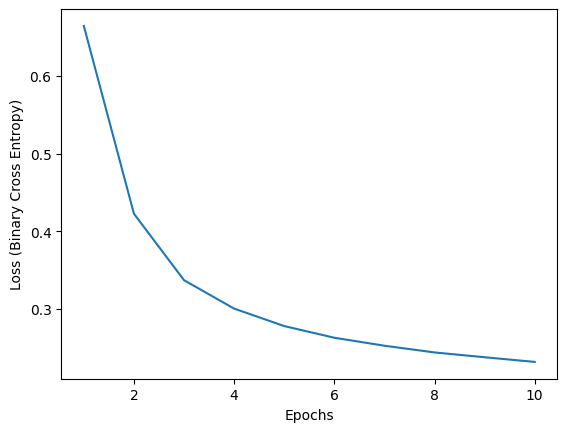

In [ ]:
plt.plot(range(1, n_epochs+1), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Cross Entropy)')
plt.show()

##Print out the precision, recall, and F1-score of the test set.

In [ ]:
# Using astype for casting boolean to int
ypred = (model.predict(X_test_scaled) >= 0.5).astype(int)
# Printing the precision, recall, and F1-score of the test set
print(classification_report(y_test, ypred))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       143
           1       0.90      0.88      0.89       139

    accuracy                           0.89       282
   macro avg       0.89      0.89      0.89       282
weighted avg       0.89      0.89      0.89       282



Print out the model execution time

In [ ]:
# Calculating execution time

start = time.time()
# trains the model for 10 itterations
epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)
end = time.time()
execution_time = (end - start) * 1000
print("Model execution time: {:.2f} ms".format(execution_time))

Model execution time: 892.45 ms


##Implement a Multi-Layer Perceptron (MLP) model

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       143
           1       0.94      0.83      0.88       139

    accuracy                           0.89       282
   macro avg       0.90      0.89      0.89       282
weighted avg       0.90      0.89      0.89       282



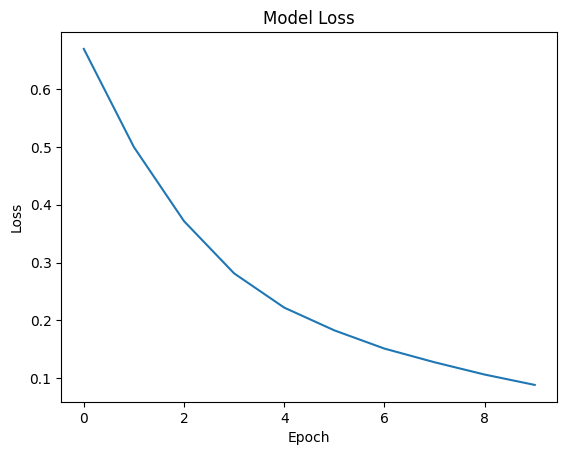

Model execution time: 1815.12 milliseconds


In [ ]:
# Defining the model with 2 hidden layer and 8 units.For output layer use sigmoid activation function for classify the data into to class and it has only one unit.

model = Sequential()
model.add(Dense(8, input_dim=X_train_scaled.shape[1], activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Then, defines the Stochastic Gradient Descent optimizer and pass the given lr to it and sets the loss function to 'binary_crossentropy'.
learning_rate = 0.1
sgd = SGD(learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

epochs = 10
start = time.time()
# Fitting model with 10 iterations
history = model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)
end = time.time()

# Since the output is a probability value between 0 and 1 round it to the nearest integer.
ypred = np.round(model.predict(X_test_scaled))

# Printing the model evaluation metrics and execution time and plot the loss for iterations.
print(classification_report(y_test, ypred))

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

execution_time = (end - start) * 1000
print("Model execution time: {:.2f} milliseconds".format(execution_time))

make a plot of iterations/epochs vs loss

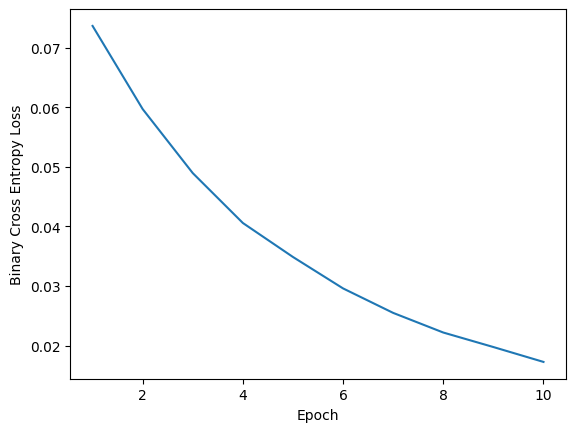

In [ ]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)
# recording loss history
loss_history = history.history['loss']

# Printing iterations/epochs
plt.plot(range(1, epochs+1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy Loss')
plt.show()

Print out the precision, recall, and F1-score of the test set

In [ ]:
# predicting classes for test set and print evaluat metrics precision, recall, and F1-score
ypred = np.round(model.predict(X_test_scaled))
print(classification_report(y_test, ypred))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       143
           1       0.92      0.86      0.89       139

    accuracy                           0.90       282
   macro avg       0.90      0.90      0.90       282
weighted avg       0.90      0.90      0.90       282



Print out the model execution time

In [ ]:
# Printing the execution time of the model

start = time.time()
ypred = model.predict(X_test_scaled)
endtime = time.time()
execution_time = (start - end) * 1000 

print("Model Execution time: {:.2f} milliseconds".format(execution_time))

9/9 [==============================] - 0s 2ms/step
Model Execution time: 2118.75 milliseconds
